In [1]:
import sys
sys.path.append('../../../src')
from helpers import *
%matplotlib widget

if not os.path.exists('Figs'):
    os.mkdir('Figs')

### Analysis functions

In [2]:
def peak_conc(m):
    max_conc = -999999999999
    min_conc = 9999999999
    max_diff = -99999999
    for i in range(len(m)):
        max_conc = max([max_conc, bounded_mean_1d(np.roll(m, i), [0, 0.2])])
        min_conc = min([min_conc, bounded_mean_1d(np.roll(m, i), [0, 0.2])])
        max_diff = max([max_diff, bounded_mean_1d(np.roll(m, i), 
                                                  [0, 0.2]) - bounded_mean_1d(np.roll(m, i + len(m) // 2), [0, 0.2])])
    return max_conc / 1000

### mlc-4 timelapse data

In [3]:
res_mlc4 = pd.read_csv('../../Raw analysis/mlc-4 RNAi/res_no_pb.csv')
df_mlc4 = pd.read_csv('../../Raw analysis/mlc-4 RNAi/df.csv')

### Wild type data

In [4]:
df = pd.read_csv('../../Raw analysis/PAR-2 NEBD quantification/NEBD_Embryos_dataframe.csv')
df_quantification = pd.read_csv('../../Raw analysis/PAR-2 NEBD quantification/QUANTIFICATION.csv')
df_quantification_grouped = df_quantification.groupby('EmbryoID')

df_summary = pd.DataFrame()
for i, r in df_quantification_grouped:
    cyt = np.mean(r['Cytoplasmic signal'])
    mem_tot = np.mean(r['Membrane signal'])
    mem_ant = bounded_mean_1d(r['Membrane signal'], [0.4, 0.6])
    mem_post = bounded_mean_1d(r['Membrane signal'], [0.9, 0.1]) 
    m = r['Membrane signal'].to_numpy()
    max_conc = peak_conc(m)
    
    p = {'EmbryoID': i, 'Cyt': cyt, 'Mem_tot': mem_tot, 'Mem_ant': mem_ant, 'Mem_post': mem_post,
        'Max conc': max_conc} 
    df_summary = df_summary.append(pd.DataFrame(p, index=[i]))
df = pd.merge(df, df_summary, on='EmbryoID')

# Filter
df = df[df.RNAi == 'wt']

# Get average peak concentration by line
wt_data_by_line = df.groupby('Line').apply(lambda x: np.mean(x['Max conc'])).to_dict()

### Plotting functions

In [10]:
def plot_membrane_conc(ax, embryoID):
    path = df_mlc4[df_mlc4.EmbryoID == embryoID].Path.iloc[0]
#     print(path)
    mems = [i['Membrane signal'].to_numpy() for (_, i) in res_mlc4[res_mlc4.EmbryoID == embryoID].groupby('Frame')]
    cyts = [i['Cytoplasmic signal'].to_numpy() for (_, i) in res_mlc4[res_mlc4.EmbryoID == embryoID].groupby('Frame')]
    
#     _fig, _ax = plt.subplots()
#     for _m in mems:
#         _ax.plot(_m)
    
    mems_peak = [peak_conc(_m) for _m, _c in zip(mems, cyts)] 
    nebd = np.loadtxt(path + '/NEBD.txt') - 1
    x = np.arange(-nebd, len(mems) - nebd)/2
    if x[0] < 0:
        print(embryoID, mems_peak[-1])
        ax.plot(x, mems_peak, linewidth=1)
    
def full_figure(line): 
    embryoIDs = df_mlc4[df_mlc4.Line == line].EmbryoID
    
    fig, ax = plt.subplots()
    for e in embryoIDs:
        plot_membrane_conc(ax, e)
        
#     ax.axhline(wt_data_by_line[line], linestyle='--', c='k')
#     ax.axvline(0, c='0.8', linestyle='--', zorder=0)
    ax.set_xlim(-5, 5)
    ax.tick_params(axis='both', labelsize=8)
    ax.set_xlabel('Time (minutes from NEBD)', fontsize=9)
    ax.set_ylabel('Peak membrane\nconcentration (a.u.)', fontsize=7)
    ax.set_ylim(bottom=0, top=45)
    fig.set_size_inches(2.5, 1.5)
    fig.subplots_adjust(bottom=0.3, left=0.25)
    return fig, ax

### Figures

<IPython.core.display.Javascript object>


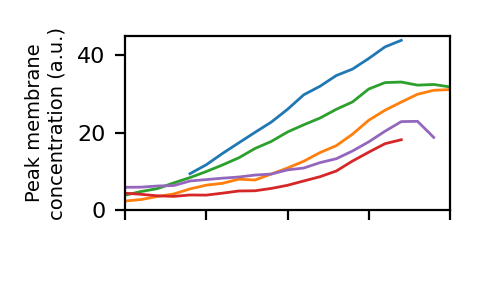

1651762677 43.87884085714286
1651764081 31.14276716190476
1651763515 29.118985453703708
1651765978 18.179366847619047
1651768497 18.77769088785047


/Users/blandt/anaconda3/anaconda3/envs/membranequant/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
fig, ax = full_figure('lp637')
ax.set_xlabel('')
ax.set_xticklabels(['', '', '', '', ''])
fig.savefig('Figs/timelapse_quantification_wt.png', dpi=600, transparent=True)

In [12]:
# fig, ax = full_figure('nwg240')

In [13]:
# fig, ax = full_figure('nwg338')

<IPython.core.display.Javascript object>


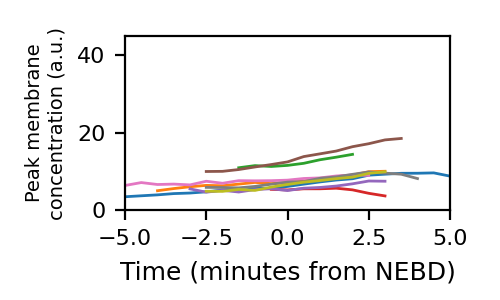

1651686192 8.1192190125
1651689529 10.019701803773588
1651690158 14.390630220588235
1651691673 3.639143358653847
1651692142 7.441955599029129
1651758810 18.501029660550458
1651759099 8.950302108163266
1651761419 8.130988153398057
1651761965 9.892149372727273


In [14]:
fig, ax = full_figure('nwg376')
fig.savefig('Figs/timelapse_quantification_gcn4.png', dpi=600, transparent=True)